In [1]:
import tweepy
import json
from textblob import TextBlob
# Twitter API credentials
consumer_key = 'cxxqcRlWH0YGjWJ38mklXnuV1'
consumer_secret = 'fqH5Db9TmuoDkcNvdeDQoOitCb4Ik9nSBCo4DzBAlVktfRzEYK'
access_token = '1411146360309485568-N5AdCrr4cv5ge6fyBmFA7vgFvO70c0'
access_token_secret = '9jJg65ClluPMSvJ1y787IiOacLSEpwwszsjd1l9rowJAS'
# create authentication object
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
# set access token and access token secret
auth.set_access_token(access_token, access_token_secret)
# create authentication object by passing auth information
api = tweepy.API(auth, wait_on_rate_limit = True)


In [2]:
#Extract 200 tweets from the twitter user
tweets = api.user_timeline(screen_name = 'Tesla', count = 200, lang = 'en', tweet_mode = 'extended')

In [3]:
#print latest 5 tweets
print('show the latest 5 tweets')
i = 1
for tweet in tweets[0:5]:
    print(str(i) + ')' +tweet.full_text + '\n')
    i = i+1

show the latest 5 tweets
1)RT @TeslaCharging: 30k Superchargers around the world — and counting https://t.co/Yw7m3cJ6HA

2)Talk through your Tesla using the Tesla app https://t.co/aYk8t9J4Hl

3)RT @TeslaCharging: Select Superchargers in the Netherlands are now open to all electric cars. https://t.co/DwPxc1vcF4 https://t.co/BveSRZUs…

4)Happy Halloween 🎃 https://t.co/d5ijx1PDjW

5)Dojo whitepaper https://t.co/4PgUGuXE0a



In [4]:
import numpy as np
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [5]:
# create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in tweets], columns = ['Tweets'])
df.head()

,Tweets
0,RT @TeslaCharging: 30k Superchargers around th...
1,Talk through your Tesla using the Tesla app ht...
2,RT @TeslaCharging: Select Superchargers in the...
3,Happy Halloween 🎃 https://t.co/d5ijx1PDjW
4,Dojo whitepaper https://t.co/4PgUGuXE0a


In [6]:
# clean text
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
def cleantext(text):
    text = re.sub(r'@[A-Za-z0-9]+', '',text) # remove @ mentions
    text = re.sub(r'#', '',text) # to remove '#'
    text = re.sub(r'RT[\s]+', '',text) # to remove RT
    text = re.sub(r'https?:\/\/\S+', '',text)
    text = emoji_pattern.sub(r'',text)
    return text
df['Tweets'] = df['Tweets'].apply(cleantext)

In [7]:
df

,Tweets
0,: 30k Superchargers around the world — and cou...
1,Talk through your Tesla using the Tesla app
2,: Select Superchargers in the Netherlands are ...
3,Happy Halloween
4,Dojo whitepaper
...,...
195,Wonder how many Bargersville residents are goi...
196,⠀ (\__/) \n ⠀ (•ㅅ•) Tesla Powerwall...
197,It's almost like using the daily free energy p...
198,“What do you think of electric cars?”\n\n*exci...


In [8]:
# doing some further cleaning:
#Cleaning and removing punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df['Tweets']= df['Tweets'].apply(lambda x: cleaning_punctuations(x))
df['Tweets'].tail()


195    Wonder how many Bargersville residents are goi...
196    ⠀          \n   ⠀  •ㅅ• Tesla Powerwall\n　＿ノ ヽ ...
197    Its almost like using the daily free energy pu...
198    “What do you think of electric cars”\n\nexcite...
199    Anyone riding a UFO out of Area 51 today can r...
Name: Tweets, dtype: object

In [9]:
#Making statement text in lower case
df['Tweets']=df['Tweets'].str.lower()
df['Tweets'].tail()

195    wonder how many bargersville residents are goi...
196    ⠀          \n   ⠀  •ㅅ• tesla powerwall\n　＿ノ ヽ ...
197    its almost like using the daily free energy pu...
198    “what do you think of electric cars”\n\nexcite...
199    anyone riding a ufo out of area 51 today can r...
Name: Tweets, dtype: object

In [10]:
# Cleaning and removing Numeric numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
df['Tweets'] = df['Tweets'].apply(lambda x: cleaning_numbers(x))
df['Tweets'].tail()

195    wonder how many bargersville residents are goi...
196    ⠀          \n   ⠀  •ㅅ• tesla powerwall\n　＿ノ ヽ ...
197    its almost like using the daily free energy pu...
198    “what do you think of electric cars”\n\nexcite...
199    anyone riding a ufo out of area  today can rec...
Name: Tweets, dtype: object

In [11]:
#remove non alphanumeric characters
def cleantext2(text):
    #text =' '.join(re.findall("[a-zA-Z]+", '',text))
    #words = [word for word in text.split() if word.isalpha()]
    text = re.sub("[^a-zA-Z]+", " ",text)
    return text
df['Tweets'] = df['Tweets'].apply(cleantext2)

In [12]:
df['Tweets']

0         k superchargers around the world and counting 
1           talk through your tesla using the tesla app 
2       select superchargers in the netherlands are n...
3                                       happy halloween 
4                                       dojo whitepaper 
                             ...                        
195    wonder how many bargersville residents are goi...
196     tesla powerwall me wanting to play teenage di...
197    its almost like using the daily free energy pu...
198     what do you think of electric cars excited sc...
199    anyone riding a ufo out of area today can rech...
Name: Tweets, Length: 200, dtype: object

In [13]:
df.head()

,Tweets
0,k superchargers around the world and counting
1,talk through your tesla using the tesla app
2,select superchargers in the netherlands are n...
3,happy halloween
4,dojo whitepaper


In [14]:
# create a function to get subjectivity
#def getsubjectivity(text):
   # return TextBlob(text).sentiment.subjectivity
# create a function to get the polarity of the text:
def getpolarity(text):
    return TextBlob(text).sentiment.polarity


In [15]:
# create columns:
#df['Subjectivity'] = df['Tweets'].apply(getsubjectivity)
df['polarity'] = df['Tweets'].apply(getpolarity)

In [16]:
df.head()

,Tweets,polarity
0,k superchargers around the world and counting,0.0
1,talk through your tesla using the tesla app,0.0
2,select superchargers in the netherlands are n...,0.0
3,happy halloween,0.8
4,dojo whitepaper,0.0


In [17]:
# creating a function to compute the positive, nuetral and negative analysis
def getAnalysis(score):
    if score < 0 :
        return 'Negative'
    elif score == 0:
        return 'Nuetral'
    else:
        return 'Positive'
        
df['sentiment'] = df['polarity'].apply(getAnalysis)   

In [18]:
df.head()

,Tweets,polarity,sentiment
0,k superchargers around the world and counting,0.0,Nuetral
1,talk through your tesla using the tesla app,0.0,Nuetral
2,select superchargers in the netherlands are n...,0.0,Nuetral
3,happy halloween,0.8,Positive
4,dojo whitepaper,0.0,Nuetral


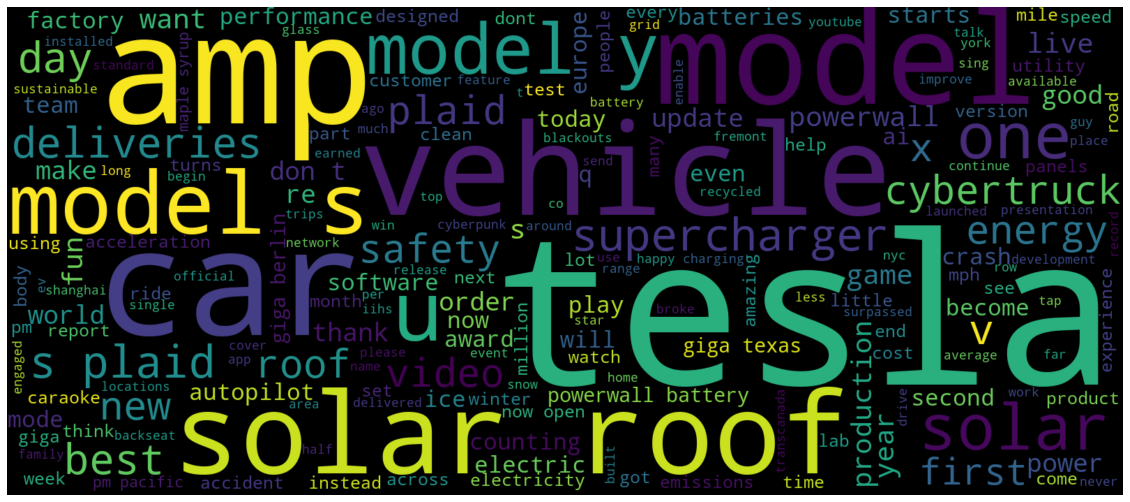

In [19]:
from wordcloud import WordCloud
#plot the wordcloud:
words = ''.join([tweet for tweet in df['Tweets']])
plt.figure(figsize = (20,20))
wordcloud = WordCloud(width = 1600, height = 700, random_state = 21, max_font_size = 300).generate(words)
plt.imshow(wordcloud,interpolation = 'bilinear' )
plt.axis('off')
plt.show()


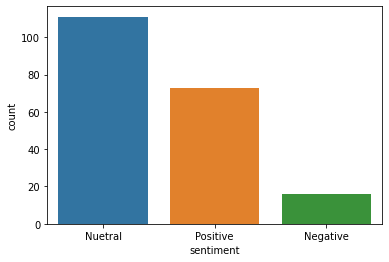

In [20]:
import seaborn as sns
sns.countplot( x = 'sentiment', data =df)
plt.show()

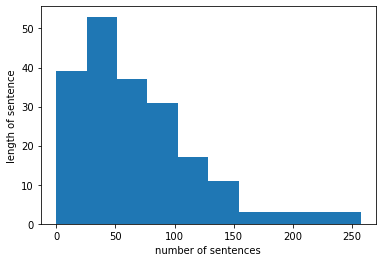

In [22]:
tweet_length = [len(t) for  t in df['Tweets']]
plt.hist(tweet_length)
plt.xlabel('number of sentences')
plt.ylabel('length of sentence')
plt.show()
    

In [23]:
# sub setting the data frame:
df = df[['Tweets', 'sentiment']]

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix,classification_report

In [25]:
# Split into training and testing data
X = df['Tweets']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

A vectorizer helps us convert text data to computer understandable numeric data.

CountVectorizer: Counts the frequency of all words in our corpus, sorts them and grabs the most recurring features (using max_features hyperparameter). But these results are mostly biased and our model might loose out on some of the important less frequent features. These are all boolean values. Ex. SEO People used to take advantage of this.

TFIDFVectorizer: TFIDF is a statistical measure said to have fixed the issues with CountVectorizer in some way. It consists of 2 parts, TF (Term Frequency) multiplied with IDF (Inverse Document Frequency). The main intuition being some words that appear frequently in 1 document and less frequently in other documents could be considered as providing extra insight for that 1 document and could help our model learn from this additional piece of information. In short, common words are penalized. These are relative frequencies identified as floating point numbers.

In [26]:
# Vectorize text reviews to numbers
vec = TfidfVectorizer(stop_words='english')
X_train = vec.fit_transform(X_train.values)
X_test = vec.transform(X_test.values)

### Multinomial NB - Naive Bayes

In [28]:
clf = MultinomialNB()
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print('Test Accuracy : %.3f'%clf.score(X_test, y_test)) ## Score method also evaluates accuracy for classification models.
print('Training Accuracy : %.3f'%clf.score(X_train, y_train))




Test Accuracy : 0.600
Training Accuracy : 0.879


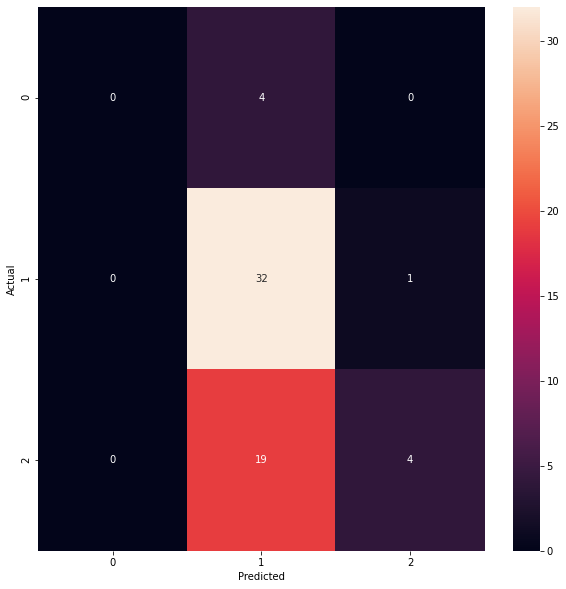

In [30]:
conf_mat = confusion_matrix(y_test, ypred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d'
            )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [31]:
print(classification_report(y_test, ypred))

#from nltk.tokenize import RegexpTokenizer
#tokenizer = RegexpTokenizer(r'\w+')
#notokenizer.tokenize

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         4
     Nuetral       0.58      0.97      0.73        33
    Positive       0.80      0.17      0.29        23

    accuracy                           0.60        60
   macro avg       0.46      0.38      0.34        60
weighted avg       0.63      0.60      0.51        60



C:\Users\mohda\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ]
         }

multinomial_nb_grid = GridSearchCV(clf, param_grid=params, n_jobs=-1, cv=5, verbose=5)
multinomial_nb_grid.fit(X_train,y_train)

print('Train Accuracy : %.3f'%multinomial_nb_grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%multinomial_nb_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%multinomial_nb_grid.best_score_)
print('Best Parameters : ',multinomial_nb_grid.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train Accuracy : 0.993
Test Accuracy : 0.650
Best Accuracy Through Grid Search : 0.657
Best Parameters :  {'alpha': 0.1}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  18 out of  25 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.0s finished


### Linear Support Vector Classification

By default scaling, LinearSVC minimizes the squared hinge loss while SVC minimizes the regular hinge loss. It is possible to manually define a 'hinge' string for loss parameter in LinearSVC.
The underlying estimators for LinearSVC are liblinear, that do in fact penalize the intercept. SVC uses libsvm estimators that do not. liblinear estimators are optimized for a linear (special) case and thus converge faster on big amounts of data than libsvm. That is why LinearSVC takes less time to solve the problem.

In [35]:
clf2 = LinearSVC()
clf2.fit(X_train,y_train)
ypred = clf2.predict(X_test)
print('Test Accuracy : %.3f'%clf2.score(X_test, y_test)) ## Score method also evaluates accuracy for classification models.
print('Training Accuracy : %.3f'%clf2.score(X_train, y_train))


Test Accuracy : 0.700
Training Accuracy : 1.000


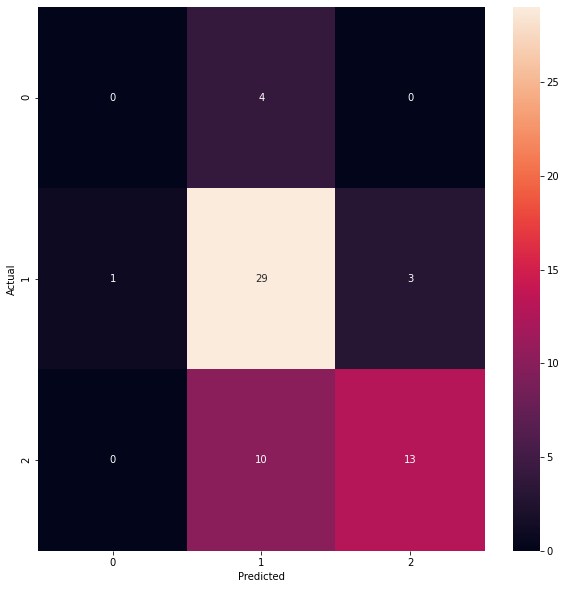

In [36]:
conf_mat = confusion_matrix(y_test, ypred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [37]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         4
     Nuetral       0.67      0.88      0.76        33
    Positive       0.81      0.57      0.67        23

    accuracy                           0.70        60
   macro avg       0.50      0.48      0.48        60
weighted avg       0.68      0.70      0.68        60



In [38]:
params = {'C': [1, 10]}
LinearSVC_grid = GridSearchCV(clf2, param_grid=params, n_jobs=-1, cv=5, verbose=5)
LinearSVC_grid.fit(X_train,y_train)

print('Train Accuracy : %.3f'%LinearSVC_grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%LinearSVC_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%LinearSVC_grid.best_score_)
print('Best Parameters : ',LinearSVC_grid.best_params_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   15.2s remaining:   10.1s


Train Accuracy : 1.000
Test Accuracy : 0.700
Best Accuracy Through Grid Search : 0.629
Best Parameters :  {'C': 1}


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   15.6s finished


In [ ]:
### 

SGD Classifier is a linear classifier (SVM, logistic regression, a.o.) optimized by the SGD. These are two different concepts.  SGD is a optimization method.

In [39]:
clf3 = SGDClassifier()
clf3.fit(X_train,y_train)
ypred = clf3.predict(X_test)
print('Test Accuracy : %.3f'%clf3.score(X_test, y_test)) 
print('Training Accuracy : %.3f'%clf3.score(X_train, y_train))


Test Accuracy : 0.683
Training Accuracy : 1.000


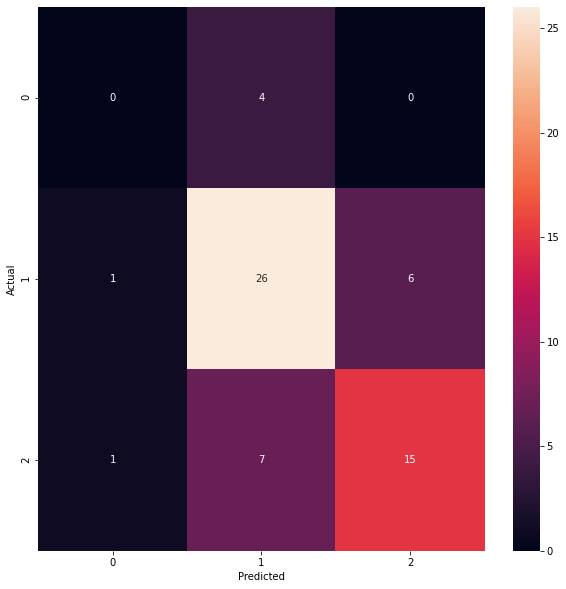

In [41]:
conf_mat = confusion_matrix(y_test, ypred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [43]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         4
     Nuetral       0.70      0.79      0.74        33
    Positive       0.71      0.65      0.68        23

    accuracy                           0.68        60
   macro avg       0.47      0.48      0.47        60
weighted avg       0.66      0.68      0.67        60



In [45]:
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ]}
SGD_grid = GridSearchCV(clf3, param_grid=params, n_jobs=-1, cv=5, verbose=5)
SGD_grid.fit(X_train,y_train)

print('Train Accuracy : %.3f'%SGD_grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%SGD_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%SGD_grid.best_score_)
print('Best Parameters : ',SGD_grid.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Train Accuracy : 0.950
Test Accuracy : 0.600
Best Accuracy Through Grid Search : 0.636
Best Parameters :  {'alpha': 0.01}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  18 out of  25 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.0s finished


### Using Deep Neural Network (SimpleRNN) with  Word Embeddings

In [46]:
import tensorflow as tf

In [47]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

In [48]:
tf.__version__

'2.7.0'

In [49]:
from tensorflow.keras.preprocessing.text import one_hot

In [50]:
X.head()

0       k superchargers around the world and counting 
1         talk through your tesla using the tesla app 
2     select superchargers in the netherlands are n...
3                                     happy halloween 
4                                     dojo whitepaper 
Name: Tweets, dtype: object

In [51]:
vocab_size = 2000
one_hot_rep = [one_hot(words,vocab_size)for words in X]
one_hot_rep

[[1529, 1478, 865, 1914, 76, 644, 1677],
 [435, 854, 812, 831, 1441, 1914, 831, 138],
 [1436, 1478, 336, 1914, 770, 451, 778, 831, 1046, 1586, 33, 1506],
 [689, 45],
 [573, 486],
 [1247, 411, 517, 1915, 1825, 1933],
 [853, 534, 1802, 1046, 930, 786, 1019, 79],
 [227, 1909, 980, 512],
 [933, 317, 1773, 831, 1187, 1491, 519, 122, 1787],
 [831, 1891, 985],
 [1460, 1857, 895, 854, 1825, 1418, 1784, 561, 1206],
 [1529, 411],
 [1344, 1373, 599, 1607, 535, 451, 812, 1751, 190, 175, 21, 501],
 [1872, 561, 815, 175, 682, 336, 999, 1673],
 [1872, 561, 914, 721, 1507, 1076, 336, 1390],
 [1825, 1418, 28, 336, 1786],
 [1825, 1425, 1022, 1223, 777, 1784, 1904, 827, 76, 1881],
 [831,
  1825,
  1425,
  1022,
  177,
  776,
  777,
  76,
  45,
  1881,
  1074,
  264,
  1938,
  33,
  128,
  399,
  379,
  137,
  205],
 [1922, 1872, 561, 1608, 336, 1586, 401, 1373, 1833],
 [848, 247, 1046, 1474, 1914, 1320, 517, 1187],
 [831, 1187, 662, 608, 461, 728, 1022, 399, 275, 1909, 1796],
 [227, 1909, 980, 512, 1373,

In [52]:
sent_len = 10
embeded_docs = pad_sequences(one_hot_rep,padding = 'pre', maxlen = sent_len)
print(embeded_docs)

[[   0    0    0 ...   76  644 1677]
 [   0    0  435 ... 1914  831  138]
 [ 336 1914  770 ... 1586   33 1506]
 ...
 [ 327 1914 1525 ...  209  264 1898]
 [   0  469 1674 ... 1506  847  377]
 [1577  399 1877 ...  310  662 1855]]


In [53]:
print(len(embeded_docs))

200


In [68]:
# creating the model with dropout
from tensorflow.keras.layers import Dropout
embedding_vector_features = 40
model = Sequential()
model.add(Embedding(vocab_size,embedding_vector_features,input_length = sent_len))
model.add(Dropout(0.3))
model.add(LSTM(100)) # one LSTM layer with 100 nuerons
#model.add(Dropout(0.3)
model.add(Dense((1),activation = 'softmax')) 
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [69]:
X_ = np.array(embeded_docs)
y_ = np.array(y)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size = 0.30, random_state=42)

In [71]:
model.fit(X_train,y_train,validation_split = 0.3, epochs = 10 )

Epoch 1/10


UnimplementedError:  Cast string to float is not supported
	 [[node categorical_crossentropy/Cast
 (defined at C:\Users\mohda\anaconda3\lib\site-packages\keras\losses.py:1654)
]] [Op:__inference_train_function_7778]

Errors may have originated from an input operation.
Input Source operations connected to node categorical_crossentropy/Cast:
In[0] ExpandDims (defined at C:\Users\mohda\anaconda3\lib\site-packages\keras\engine\compile_utils.py:677)

Operation defined at: (most recent call last)
>>>   File "C:\Users\mohda\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
>>>     return _run_code(code, main_globals, None,
>>> 
>>>   File "C:\Users\mohda\anaconda3\lib\runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "C:\Users\mohda\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "C:\Users\mohda\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
>>>     app.start()
>>> 
>>>   File "C:\Users\mohda\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
>>>     self.io_loop.start()
>>> 
>>>   File "C:\Users\mohda\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 149, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "C:\Users\mohda\anaconda3\lib\asyncio\base_events.py", line 570, in run_forever
>>>     self._run_once()
>>> 
>>>   File "C:\Users\mohda\anaconda3\lib\asyncio\base_events.py", line 1859, in _run_once
>>>     handle._run()
>>> 
>>>   File "C:\Users\mohda\anaconda3\lib\asyncio\events.py", line 81, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "C:\Users\mohda\anaconda3\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
>>>     lambda f: self._run_callback(functools.partial(callback, future))
>>> 
>>>   File "C:\Users\mohda\anaconda3\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
>>>     ret = callback()
>>> 
>>>   File "C:\Users\mohda\anaconda3\lib\site-packages\tornado\gen.py", line 787, in inner
>>>     self.run()
>>> 
>>>   File "C:\Users\mohda\anaconda3\lib\site-packages\tornado\gen.py", line 748, in run
>>>     yielded = self.gen.send(value)
>>> 
>>>   File "C:\Users\mohda\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
>>>     yield gen.maybe_future(dispatch(*args))
>>> 
>>>   File "C:\Users\mohda\anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
>>>     yielded = next(result)
>>> 
>>>   File "C:\Users\mohda\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
>>>     yield gen.maybe_future(handler(stream, idents, msg))
>>> 
>>>   File "C:\Users\mohda\anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
>>>     yielded = next(result)
>>> 
>>>   File "C:\Users\mohda\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 543, in execute_request
>>>     self.do_execute(
>>> 
>>>   File "C:\Users\mohda\anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
>>>     yielded = next(result)
>>> 
>>>   File "C:\Users\mohda\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 306, in do_execute
>>>     res = shell.run_cell(code, store_history=store_history, silent=silent)
>>> 
>>>   File "C:\Users\mohda\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
>>>     return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
>>> 
>>>   File "C:\Users\mohda\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2877, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "C:\Users\mohda\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2923, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "C:\Users\mohda\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "C:\Users\mohda\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3146, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "C:\Users\mohda\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes
>>>     if (await self.run_code(code, result,  async_=asy)):
>>> 
>>>   File "C:\Users\mohda\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "<ipython-input-71-766a853947ea>", line 1, in <module>
>>>     model.fit(X_train,y_train,validation_split = 0.3, epochs = 10 )
>>> 
>>>   File "C:\Users\mohda\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\mohda\anaconda3\lib\site-packages\keras\engine\training.py", line 1216, in fit
>>>     tmp_logs = self.train_function(iterator)
>>> 
>>>   File "C:\Users\mohda\anaconda3\lib\site-packages\keras\engine\training.py", line 878, in train_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "C:\Users\mohda\anaconda3\lib\site-packages\keras\engine\training.py", line 867, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "C:\Users\mohda\anaconda3\lib\site-packages\keras\engine\training.py", line 860, in run_step
>>>     outputs = model.train_step(data)
>>> 
>>>   File "C:\Users\mohda\anaconda3\lib\site-packages\keras\engine\training.py", line 809, in train_step
>>>     loss = self.compiled_loss(
>>> 
>>>   File "C:\Users\mohda\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
>>>     loss_value = loss_obj(y_t, y_p, sample_weight=sw)
>>> 
>>>   File "C:\Users\mohda\anaconda3\lib\site-packages\keras\losses.py", line 141, in __call__
>>>     losses = call_fn(y_true, y_pred)
>>> 
>>>   File "C:\Users\mohda\anaconda3\lib\site-packages\keras\losses.py", line 245, in call
>>>     return ag_fn(y_true, y_pred, **self._fn_kwargs)
>>> 
>>>   File "C:\Users\mohda\anaconda3\lib\site-packages\keras\losses.py", line 1654, in categorical_crossentropy
>>>     y_true = tf.cast(y_true, y_pred.dtype)
>>> 

In [ ]:
y_pred = model.predict_classes(X_test)



In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
            #xticklabels='a', yticklabels='b')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
print('Test Accuracy : %.3f'%model.score(X_test, Y_test)) 
print('Training Accuracy : %.3f'%model.score(X_train, Y_train))